# **Praktikum Kecerdasan Buatan**
## **Post Test 5 - Supervised Learning**
### **Klasifikasi Pokemon Legendaris berdasarkan Data Statistik Pokemon**
#### Tjeng, Ivan Cahyadi, 2009106146
---

# **Import Library**

In [1]:
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split # Data Split
from sklearn.preprocessing import StandardScaler # Standardisasi
from sklearn.preprocessing import MinMaxScaler # Normalisasi

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB # Naive Bayes
from sklearn.svm import SVC # SVM

## **Baca Dataset**
##### [Pokemon with stats](https://www.kaggle.com/datasets/abcsds/pokemon)

In [2]:
pokemon_dataset = pd.read_csv('Pokemon.csv')

## **5 Data Teratas**

In [3]:
pokemon_dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## **5 Data Terbawah**

In [4]:
pokemon_dataset.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## **Jumlah Baris dan Kolom pada Dataset**

In [ ]:
pokemon_dataset.shape

(800, 13)

## **Jumlah Pokemon Legendaris dan Non-Legendaris**
*   False adalah Pokemon Non Legendaris
*   True adalah Pokemon Legendaris



In [ ]:
pokemon_dataset['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

# **Informasi Dataset**

In [ ]:
pokemon_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## **Ringkasan Statistik Dataset**

In [ ]:
pokemon_dataset[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## **Korelasi antar Attribute Dataset**

In [ ]:
pokemon_dataset[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


## **Melihat Jumlah Data yang memiliki nilai Null pada setiap Atributnya**

In [ ]:
pokemon_dataset.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## **Melihat Jumlah Data Duplikat**

In [ ]:
pokemon_dataset.duplicated().sum()

0

## **Pie Chart untuk Melihat Persentase Pokemon Legendaris dan Non-Legendaris**

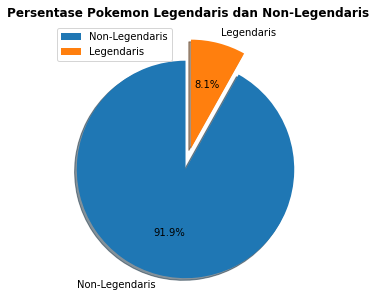

In [ ]:
plt.figure(figsize = (5,5))
plt.pie(pokemon_dataset['Legendary'].value_counts(), labels = ['Non-Legendaris', 'Legendaris'], startangle = 90, autopct = '%.1f%%', shadow = True, explode = [0.1, 0.1])
plt.title('Persentase Pokemon Legendaris dan Non-Legendaris', fontweight = 'bold')
plt.legend()
plt.show()

## **Bar Chart untuk Melihat Jumlah Pokemon Legendaris Setiap Generasi**

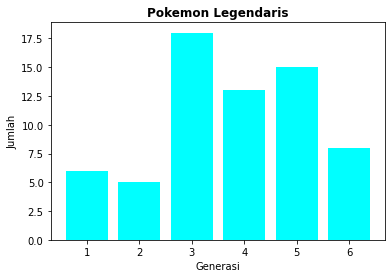

In [ ]:
plt.bar(pokemon_dataset.loc[pokemon_dataset['Legendary'] == True]['Generation'].value_counts().keys().to_list(), pokemon_dataset.loc[pokemon_dataset['Legendary'] == True]['Generation'].value_counts(), color = 'cyan')
plt.title('Pokemon Legendaris', fontweight = 'bold')
plt.xlabel('Generasi')
plt.ylabel('Jumlah')
plt.show()

## **Heatmap Chart untuk Melihat Korelasi Atribut Statistik Pokemon dengan Atribut 'Legendary'**

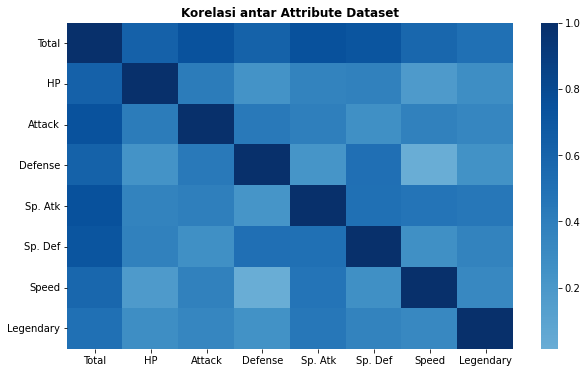

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pokemon_dataset[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr(), center=0, cmap='Blues')
ax.set_title('Korelasi antar Attribute Dataset', fontweight = 'bold')
plt.show()

## **Hapus Kolom yang Tidak Diperlukan**
#### Kolom yang tidak diperlukan:
*   #
*   Name
*   Type 1
*   Type 2
*   Generation

In [6]:
pokemon_dataset_dropped_column = pokemon_dataset.copy()

In [7]:
pokemon_dataset_dropped_column.drop(['#', 'Name', 'Type 1', 'Type 2', 'Generation'], axis = 1, inplace = True)

In [8]:
pokemon_dataset_dropped_column.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False


## **Standardisasi**

In [78]:
standardized_pokemon_dataset = pokemon_dataset_dropped_column.copy()

In [79]:
standardScaler = StandardScaler()

In [86]:
standardized_pokemon_dataset = pd.DataFrame(standardScaler.fit_transform(standardized_pokemon_dataset[['Total',	'HP', 'Attack',	'Defense', 'Sp. Atk',	'Sp. Def',	'Speed']]), columns = ['Total',	'HP', 'Attack',	'Defense', 'Sp. Atk',	'Sp. Def',	'Speed'])
standardized_pokemon_dataset = standardized_pokemon_dataset.join(pokemon_dataset_dropped_column['Legendary'])
standardized_pokemon_dataset

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,False
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,False
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,False
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,False
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,False
...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,True
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,True
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,True
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,True


## **Normalisasi**

In [88]:
normalized_pokemon_dataset = pokemon_dataset_dropped_column.copy()

In [89]:
minMaxScaler = MinMaxScaler()

In [90]:
normalized_pokemon_dataset = pd.DataFrame(minMaxScaler.fit_transform(normalized_pokemon_dataset[['Total',	'HP', 'Attack',	'Defense', 'Sp. Atk',	'Sp. Def',	'Speed']]), columns = ['Total',	'HP', 'Attack',	'Defense', 'Sp. Atk',	'Sp. Def',	'Speed'])
normalized_pokemon_dataset = normalized_pokemon_dataset.join(pokemon_dataset_dropped_column['Legendary'])
normalized_pokemon_dataset

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False
...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,True
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,True
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,True
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,True


## **Split Data**
#### Split Ratio: 70% 30%

In [101]:
data = normalized_pokemon_dataset[['Total',	'HP', 'Attack',	'Defense', 'Sp. Atk',	'Sp. Def',	'Speed']]
label = normalized_pokemon_dataset['Legendary']

In [102]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

In [103]:
# check the separated data length
print(f'the length of data train is {len(data_train)} row',
      f'the length of label train is {len(label_train)} row',
      f'the length of data test is {len(data_test)} row',
      f'the length of label test is {len(label_test)} row',
      sep='\n')

the length of data train is 560 row
the length of label train is 560 row
the length of data test is 240 row
the length of label test is 240 row


## **K-Nearest Neighbor Classifier**

In [104]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

In [105]:
knn_classifier.fit(data_train, label_train)

KNeighborsClassifier()

## **Decision Tree Classifier**

In [119]:
decision_tree_classifier = DecisionTreeClassifier()

In [120]:
decision_tree_classifier.fit(data_train, label_train)

DecisionTreeClassifier()

## **Multinomial Naive Bayes Classifier**

In [107]:
multinomialNB_classifier = MultinomialNB()

In [108]:
multinomialNB_classifier.fit(data_train, label_train)

MultinomialNB()

## **Bernoulli Naive Bayes Classifier**

In [111]:
bernoulliNB_classifier = BernoulliNB()

In [112]:
bernoulliNB_classifier.fit(data_train, label_train)

BernoulliNB()

## **Gaussian Naive Bayes Classifier**

In [116]:
gaussianNB_classifier = GaussianNB()

In [117]:
gaussianNB_classifier.fit(data_train, label_train)

GaussianNB()

## **Support Vector Machine Classifier**

In [122]:
svm_classifier = SVC()

In [123]:
svm_classifier.fit(data_train, label_train)

SVC()

## **Semua Skor Model**
###### Skor tertinggi diberikan oleh model dengan algoritma Decision Tree

In [133]:
print(f'Skor Model KNN dengan k=5\t\t: {knn_classifier.score(data_test, label_test)}',
      f'Skor Model Decision Tree\t\t: {decision_tree_classifier.score(data_test, label_test)}',
      f'Skor Model Multinomial Naive Bayes\t: {multinomialNB_classifier.score(data_test, label_test)}',
      f'Skor Model Bernoulli Naive Bayes\t: {bernoulliNB_classifier.score(data_test, label_test)}',
      f'Skor Model Gaussian Naive Bayes\t\t: {gaussianNB_classifier.score(data_test, label_test)}',
      f'Skor Model SVM\t\t\t\t: {svm_classifier.score(data_test, label_test)}',
      sep = '\n' + '-'*60 + '\n')

Skor Model KNN dengan k=5		: 0.9375
------------------------------------------------------------
Skor Model Decision Tree		: 0.9625
------------------------------------------------------------
Skor Model Multinomial Naive Bayes	: 0.9333333333333333
------------------------------------------------------------
Skor Model Bernoulli Naive Bayes	: 0.925
------------------------------------------------------------
Skor Model Gaussian Naive Bayes		: 0.9208333333333333
------------------------------------------------------------
Skor Model SVM				: 0.9375
